## text mining from web page

In [1]:
url = 'https://en.wikipedia.org/wiki/Deep_learning'
url = 'https://en.wikipedia.org/wiki/Data_mining'

# Step 1: Getting the Data

In [4]:
!pip install requests

import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

You should consider upgrading via the 'C:\Users\adewale\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


     -------------------------------------- 62.8/62.8 KB 224.8 kB/s eta 0:00:00
     ------------------------------------ 139.0/139.0 KB 284.2 kB/s eta 0:00:00
     ------------------------------------ 160.2/160.2 KB 400.0 kB/s eta 0:00:00
     -------------------------------------- 61.2/61.2 KB 407.4 kB/s eta 0:00:00
<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data mining - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"34dc5832-f9cb-43f8-9a4e-848af1aea9af","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Data_mining","wgTitle":"Data mining","wgCurRevisionId":1092672010,"

#Step 2: Transforming the Data

The next step is to convert the data into the form suitable for processing. In our case, we have downloaded HTML source code from the page, and we need to convert it into plain text.

There are many ways this can be done. We will use the simplest built-in HTMLParser object from Python. We need to subclass the HTMLParser class and define the code that will collect all text inside HTML tags, except <script> and <style> tags.

In [5]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data mining - Wikipedia Data mining From Wikipedia, the free encyclopedia Jump to navigation Jump to search Process of extracting and discovering patterns in large data sets Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine (RVM) Support vector machine (SVM) Clustering BIRCH CURE Hierarchical k -means Expectation–maximization (EM) DBSCAN OPTICS Mean shift Dimensionality reduction Factor analysis CCA ICA LDA NMF PCA PGD t-SNE Structured prediction Graphical models Bayes net Condi

#Step 3: Getting Insights

The most important step is to turn our data into some form from which we can draw insights. In our case, we want to extract keywords from the text, and see which keywords are more meaningful.

We will use Python library called RAKE for keyword extraction. First, let's install this library in case it is not present:

In [6]:
import sys
!{sys.executable} -m pip install nlp_rake

     ------------------------------------ 981.5/981.5 KB 706.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 262.0/262.0 KB 950.1 kB/s eta 0:00:00
Using legacy 'setup.py install' for langdetect, since package 'wheel' is not installed.
  Running setup.py install for langdetect: started
  Running setup.py install for langdetect: finished with status 'done'


You should consider upgrading via the 'c:\Users\adewale\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('test set', 4.0),
 ('united states', 4.0),
 ('copyright law', 4.0),
 ('morgan kaufmann', 4.0),
 ('wayback machine', 4.0),
 ('data mining', 3.962025316455696),
 ('content mining', 3.962025316455696),
 ('machine learning', 3.928571428571429),
 ('artificial intelligence', 3.857142857142857),
 ('knowledge discovery', 3.85),
 ('learned patterns', 3.7142857142857144),
 ('data analysis', 3.6875),
 ('gregory piatetsky-shapiro', 3.4000000000000004),
 ('mining', 1.9620253164556962),
 ('knowledge', 1.85),
 ('privacy', 1.8),
 ('patterns', 1.7142857142857142),
 ('analysis', 1.6875),
 ('information', 1.5625),
 ('terms', 1.5),
 ('methods', 1.4444444444444444),
 ('statistics', 1.4285714285714286),
 ('extraction', 1.4),
 ('practice', 1.4),
 ('applied', 1.4),
 ('process', 1.3333333333333333),
 ('field', 1.25),
 ('e-mails', 1.25),
 ('pre-processing', 1.2),
 ('present', 1.2),
 ('techniques', 1.1428571428571428),
 ('crisp-dm', 1.1428571428571428),
 ('applications', 1.1111111111111112),
 ('databases', 1.0

#Step 4: Visualizing the Result

People can interpret the data best in the visual form. Thus it often makes sense to visualize the data in order to draw some insights. We can use matplotlib library in Python to plot simple distribution of the keywords with their relevance:

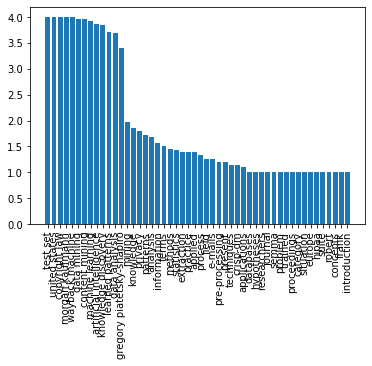

In [8]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

There is, however, even better way to visualize word frequencies - using **Word Cloud**. We will need to install another library to plot the word cloud from our keyword list.

In [20]:

import sys
print(sys.executable)


c:\Users\adewale\AppData\Local\Programs\Python\Python310\python.exe


In [25]:
!pip3 install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
  Running setup.py install for wordcloud: started
  Running setup.py install for wordcloud: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Running setup.py install for wordcloud did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      running install
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-3.10
      creating build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\color_from_image.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\tokenization.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\wordcloud.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\_version.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\__init__.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\__main__.py -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\stopwords -> build\lib.win-amd64-3.10\wordcloud
      copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd

In [26]:
pip install wheel

You should consider upgrading via the 'c:\Users\adewale\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [28]:
pip install https://github.com/sulunemre/word_cloud/releases/download/2/wordcloud-0.post1+gd8241b5-cp310-cp310-win_amd64.whl

     ------------------------------------ 153.2/153.2 KB 294.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\adewale\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


WordCloud object is responsible for taking in either original text, or pre-computed list of words with their frequencies, and returns and image, which can then be displayed using matplotlib:

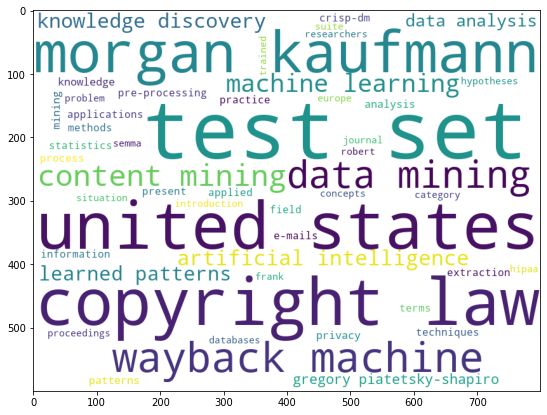

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

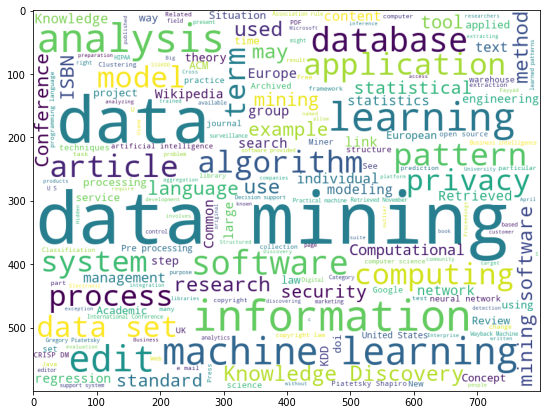

In [30]:
'''We can also pass in the original text to WordCloud - let's see if we are able 
to get similar result:'''

plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [36]:
wc.generate(text).to_file('Pictures\wordcloud.png')

FileNotFoundError: [Errno 2] No such file or directory: 'Pictures\\wordcloud.png'